In [ ]:
# Importing libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,  accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import pickle

Loading and cleaning the dataset

In [25]:
# Loading dataset
data = pd.read_csv('training.csv')

print("First 5 Rows of the Dataset:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print(f"\nDataset Shape: {data.shape}")


First 5 Rows of the Dataset:
    itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0  0.000000   1.000000              0.000000              0.00000   0.000000   
1  0.146774   0.205156             -0.021239              0.43378   0.074531   
2  0.000000   0.000000              0.000000              0.00000   0.000000   
3  0.000000   0.000000              0.000000              0.00000   0.000000   
4  0.000000   0.000000              0.000000              0.00000   0.000000   

     chills  joint_pain  stomach_pain   acidity  ulcers_on_tongue  ...  \
0  1.000000    1.000000      0.000000  0.000000          0.000000  ...   
1 -0.013983   -0.861033     -0.032538 -0.016484          0.988003  ...   
2  0.000000    0.000000      0.000000  0.000000          0.000000  ...   
3  0.000000    0.000000      0.000000  0.000000          0.000000  ...   
4  0.000000    0.000000      0.000000  0.000000          0.000000  ...   

   blackheads  scurring  skin_peeling  silver

In [26]:
# Checking for missing values
print("Missing Values Before Cleaning:")
print(data.isnull().sum())


Missing Values Before Cleaning:
itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64


Since there are missing values, both numerical and categorical, removing them by adding mean value in the numerical columns and mode value in the categorical columns.

In [27]:
# Handling missing values

#filling mean value for numerical values
for col in data.select_dtypes(include=['number']).columns:
    if data[col].isnull().sum() > 0:
        print(f"Filling missing values in numerical column: {col}")
        data[col].fillna(data[col].mean(), inplace=True)

#filling mode value for categorical values
for col in data.select_dtypes(include=['object']).columns:
    if data[col].isnull().sum() > 0:
        print(f"Filling missing values in categorical column: {col}")
        data[col].fillna(data[col].mode()[0], inplace=True)

# cheking if missing values are dealt with
print("\nMissing Values After Cleaning:")
print(data.isnull().sum())



Missing Values After Cleaning:
itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64


In [28]:
# Displaying summary of the cleaned dataset
print("Summary of Cleaned Data:")
print(data.describe())
print("\nFirst 5 Rows of the Cleaned Data:")
print(data.head())


Summary of Cleaned Data:
            itching     skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  20480.000000  20480.000000          20480.000000         20480.000000   
mean       0.157454      0.180496              0.046066             0.056029   
std        0.388465      0.403625              0.246457             0.264255   
min       -1.124399     -1.144893             -1.092302            -1.512659   
25%        0.000000      0.000000              0.000000             0.000000   
50%        0.000000      0.000000              0.000000             0.000000   
75%        0.077260      0.162045              0.000000             0.000000   
max        1.858422      1.958978              1.716941             1.915482   

          shivering        chills    joint_pain  stomach_pain       acidity  \
count  20480.000000  20480.000000  20480.000000  20480.000000  20480.000000   
mean       0.033510      0.167133      0.146635      0.055867      0.056390   
std        0.2217

In [29]:
# Dataset Overview
print("Dataset Shape:", data.shape)
print("Columns in the Dataset:", data.columns.tolist())

print("First 5 Rows:")
print(data.head())

print("Summary Statistics of Numerical Features:")
print(data.describe())

print("Missing Values in Each Column:")
print(data.isnull().sum())


Dataset Shape: (20480, 133)
Columns in the Dataset: ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'wea

In [30]:
# Separating features and target
features = data.columns[:-1]
target = data.columns[-1]

X = data[features]
y = data[target]

print("Features Selected:")
print(features)

print("\nTarget Selected:")
print(target)

class_distribution = data['prognosis'].value_counts()

Features Selected:
Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)

Target Selected:
prognosis


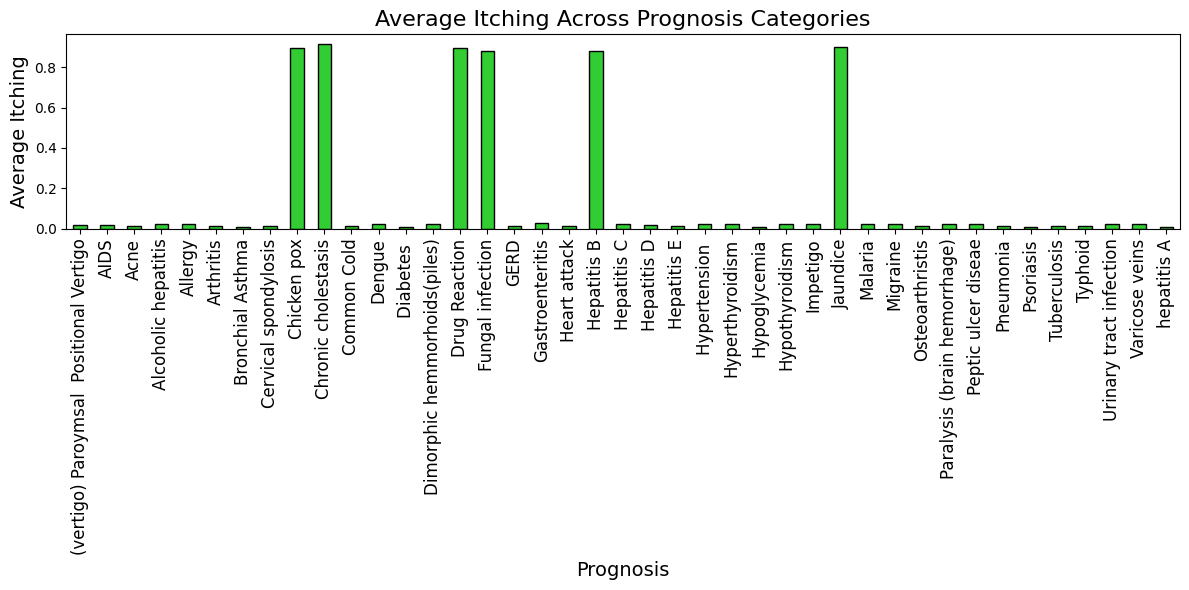

In [31]:
# Visualizing a relationship between a symptom and prognosis
symptom = 'itching'

plt.figure(figsize=(12, 6))
data.groupby('prognosis')[symptom].mean().plot(kind='bar', color='limegreen', edgecolor='black')
plt.title(f"Average {symptom.capitalize()} Across Prognosis Categories", fontsize=16)
plt.xlabel("Prognosis", fontsize=14)
plt.ylabel(f"Average {symptom.capitalize()}", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()

Average itching across prognosis categories indicates that itching is more indicative of diseases like chicken pox and fungal infection

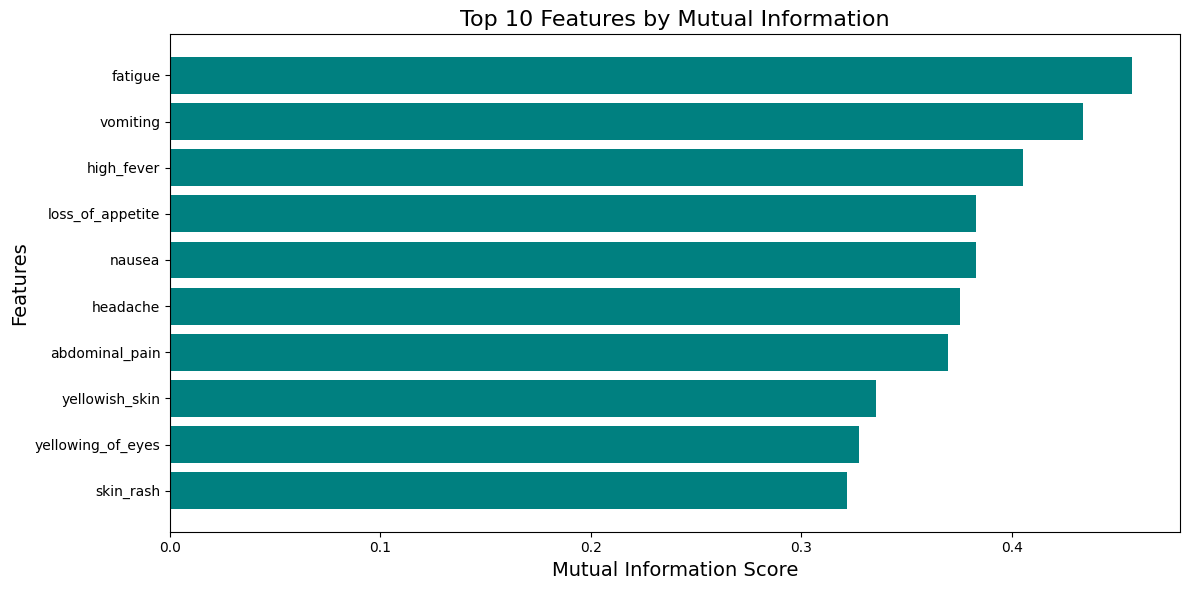

In [32]:

# Computing mutual information
X = data.iloc[:, :-1]  # Excluding target column
y = data['prognosis'].astype('category').cat.codes
mutual_info = mutual_info_classif(X, y, random_state=42)

feature_importance = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)[:10]

# Plotting top 10 features
plt.figure(figsize=(12, 6))
plt.barh(feature_importance.index, feature_importance.values, color='teal')
plt.title("Top 10 Features by Mutual Information", fontsize=16)
plt.xlabel("Mutual Information Score", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


The bar chart ranks the top 10 symptoms based on their mutual information scores, showing how strongly each symptom (e.g., fatigue, vomiting) relates to predicting the target disease (prognosis).

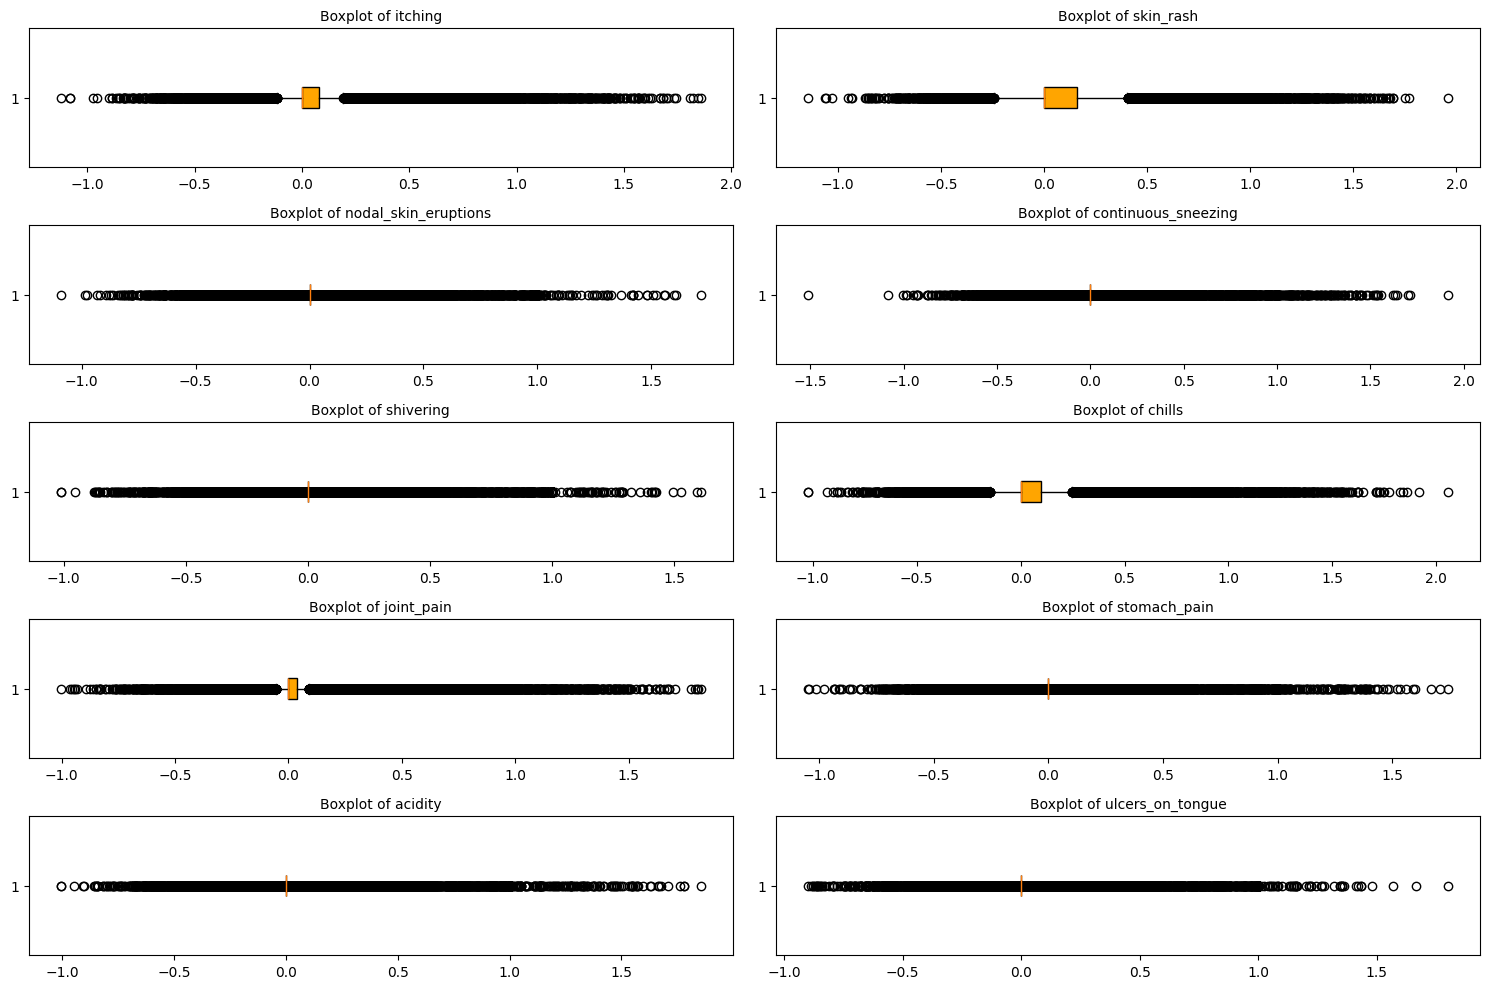

In [12]:
# Selecting a subset of numeric columns for demonstration
sample_columns = data.columns[:10]

plt.figure(figsize=(15, 10))
for i, col in enumerate(sample_columns):
    plt.subplot(5, 2, i + 1)
    plt.boxplot(data[col], vert=False, patch_artist=True, boxprops=dict(facecolor='orange'))
    plt.title(f'Boxplot of {col}', fontsize=10)
    plt.tight_layout()
plt.show()


These boxplots show the distribution of various symptom features. Most values are clustered around 0, with some outliers representing rare or extreme symptom intensities.

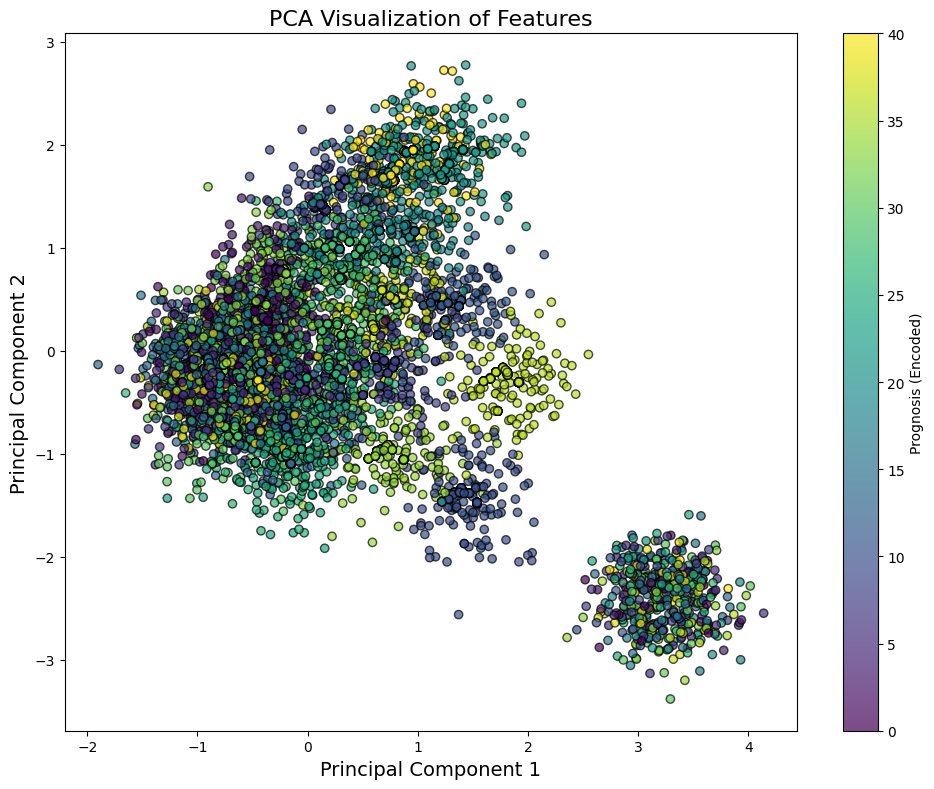

In [13]:

# Performing PCA on the dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title("PCA Visualization of Features", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.colorbar(label="Prognosis (Encoded)")
plt.tight_layout()
plt.show()


The scatterplot  uses PCA to reduce many symptom features into two main components, x and y axis. Each dot represents a patient, and the colors show patients disease. The clusters of dots show patients with similar symptoms, while overlaps between clusters suggest diseases with shared symptoms.

In [14]:
#applying standardscaler to the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Since the data is highly imbalanced, using SMOTE to balance the data.

In [15]:
#appling smote to balance the data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
class_distribution = data['prognosis'].value_counts()

performing a 80/20 train-test split

In [16]:
#performing a 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print("Shapes of Train and Test sets:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

Shapes of Train and Test sets:
X_train: (25977, 132), X_test: (6495, 132)
y_train: (25977,), y_test: (6495,)


Evaluation of different models :
logistic regression
random forest
K-nearest neighbour
decision tree

evaluating and selecting the best model

In [17]:
# logistic regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)

# Making predictions
y_pred = logistic_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report for logistic regression model:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9176

Classification Report for logistic regression model:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       146
           1       0.93      0.89      0.91       159
           2       0.93      0.88      0.90       171
           3       0.92      0.92      0.92       156
           4       0.88      0.87      0.87       165
           5       0.94      0.91      0.92       165
           6       0.90      0.87      0.88       149
           7       0.88      0.91      0.90       151
           8       0.90      0.94      0.92       167
           9       0.89      0.94      0.92       163
          10       0.93      0.86      0.89       171
          11       0.91      0.93      0.92       137
          12       0.94      0.91      0.93       162
          13       0.94      0.91      0.93       164
          14       0.95      0.92      0.93       171
          15       0.91      0.90      0.91       177
          

In [33]:
# Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Making predictions
y_pred = rf_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report for random forest:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9424

Classification Report for random forest:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       146
           1       0.95      0.92      0.93       159
           2       0.96      0.92      0.94       171
           3       0.95      0.95      0.95       156
           4       0.95      0.93      0.94       165
           5       0.97      0.93      0.95       165
           6       0.94      0.88      0.91       149
           7       0.90      0.93      0.92       151
           8       0.95      0.94      0.95       167
           9       0.95      0.96      0.95       163
          10       0.96      0.91      0.94       171
          11       0.94      0.96      0.95       137
          12       0.95      0.93      0.94       162
          13       0.96      0.93      0.94       164
          14       0.95      0.95      0.95       171
          15       0.93      0.93      0.93       177
          16       0.9

In [ ]:
# KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Making predictions
y_pred = knn_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Reportfor KNN model:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9361

Classification Reportfor KNN model:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       146
           1       0.94      0.92      0.93       159
           2       0.92      0.93      0.93       171
           3       0.87      0.95      0.91       156
           4       0.93      0.93      0.93       165
           5       0.91      0.93      0.92       165
           6       0.94      0.89      0.91       149
           7       0.89      0.93      0.91       151
           8       0.92      0.94      0.93       167
           9       0.97      0.94      0.96       163
          10       0.96      0.91      0.94       171
          11       0.90      0.95      0.93       137
          12       0.94      0.92      0.93       162
          13       0.97      0.92      0.95       164
          14       0.95      0.91      0.93       171
          15       0.94      0.93      0.94       177
          16       0.97    

In [ ]:
# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Making predictions
y_pred = dt_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report for Decision Tree model:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8993

Classification Report for Decision Tree model:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       146
           1       0.90      0.84      0.87       159
           2       0.90      0.89      0.90       171
           3       0.88      0.92      0.90       156
           4       0.93      0.84      0.88       165
           5       0.93      0.88      0.91       165
           6       0.88      0.86      0.87       149
           7       0.91      0.86      0.88       151
           8       0.91      0.92      0.91       167
           9       0.85      0.90      0.87       163
          10       0.91      0.89      0.90       171
          11       0.93      0.91      0.92       137
          12       0.88      0.87      0.88       162
          13       0.94      0.91      0.93       164
          14       0.89      0.89      0.89       171
          15       0.90      0.90      0.90       177
          16    

Random Forest was chosen as the best model due to its highest accuracy (94.24%) and consistently strong precision, recall, and F1 scores across all classes. It balances performance and generalization, handles class imbalance effectively, and identifies important features, making it robust and reliable for predicting diseases based on symptoms.

Refining Random Forest Model by Hyperparameter Tuning Using RandomizedSearchCV

In [ ]:
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                               param_distributions=param_dist,
                               n_iter=50,
                               cv=3,
                               verbose=2,
                               n_jobs=-1,
                               random_state=42)

# Fitting the model
rf_random.fit(X_train, y_train)

# Getting the best parameters and model
print(f"Best Parameters: {rf_random.best_params_}")
print(f"Best Score: {rf_random.best_score_}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best Score: 0.9398313893059246


Calculating accuracy score for the RandomizedSearchCV fine tuned model

In [ ]:
# Using the tuned model from RandomizedSearchCV
best_rf_model = rf_random.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)

# Calculating accuracy score
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Model Accuracy: {accuracy_tuned:.4f}\n")

#classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_tuned))

Tuned Model Accuracy: 0.9426

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       146
           1       0.94      0.92      0.93       159
           2       0.95      0.93      0.94       171
           3       0.95      0.95      0.95       156
           4       0.95      0.93      0.94       165
           5       0.96      0.93      0.94       165
           6       0.94      0.88      0.91       149
           7       0.90      0.93      0.91       151
           8       0.96      0.94      0.95       167
           9       0.93      0.96      0.95       163
          10       0.96      0.92      0.94       171
          11       0.93      0.96      0.95       137
          12       0.94      0.93      0.93       162
          13       0.95      0.93      0.94       164
          14       0.95      0.95      0.95       171
          15       0.94      0.93      0.94       177
          16       0.97     

The accuracy score of the tuned model(0.9426) was slightly better than the accuracy score of the pre-tuning model(0.9424). Now, pickling the fine tuned model in a .pkl file for use through the GUI.  

In [23]:
# Pickling the tuned model
model_file = "tuned_random_forest_model.pkl"

with open(model_file, 'wb') as file:
    pickle.dump(best_rf_model, file)

print('Model saved as '+model_file)

Model saved as tuned_random_forest_model.pkl
